### MNIST Dataset

Description: Comprises 28x28 pixel grayscale images of handwritten digits (0-9). This dataset is a good choice for those looking to work with image data, providing a balance of challenge and accessibility.

Reshape the 28x28 images into flat 784-pixel arrays.
Normalize pixel values to range between 0 and 1.
Convert labels into one-hot encoded vectors.
Optionally, create a validation set to aid in hyperparameter tuning.



In [3]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [9]:
from tensorflow.keras.datasets import fashion_mnist

data = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 23s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 7s 2us/step


### Splitting my data into Train, Validation and Test

In [13]:
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = data

In [15]:
# Construct a validation set from the last 10000 images and labels from
# train_and_validation_images and train_and_validation_labels
validation_images = train_and_validation_images[-10000:, :, :]
validation_labels = train_and_validation_labels[-10000:] # Assign the corresponding labels

# Construct a training set from the first 50000 images and labels.
train_images = train_and_validation_images[:50000, :, :]
train_labels = train_and_validation_labels[:50000] # Assign the corresponding labels

In [17]:
text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

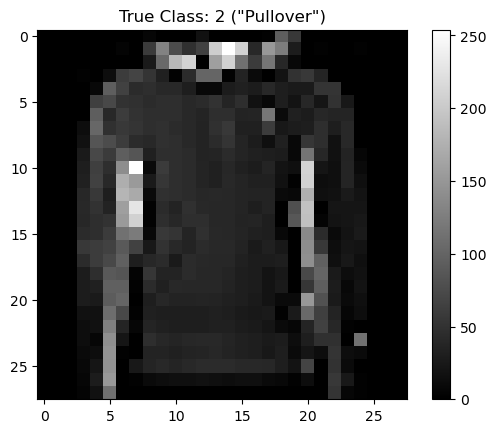

In [19]:
plt.figure()
random_index = np.random.randint(0, len(train_images))
plt.imshow(train_images[random_index], cmap='gray')
plt.colorbar()
numerical_label = train_labels[random_index]
text_description = text_labels[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))

plt.gca().grid(False)

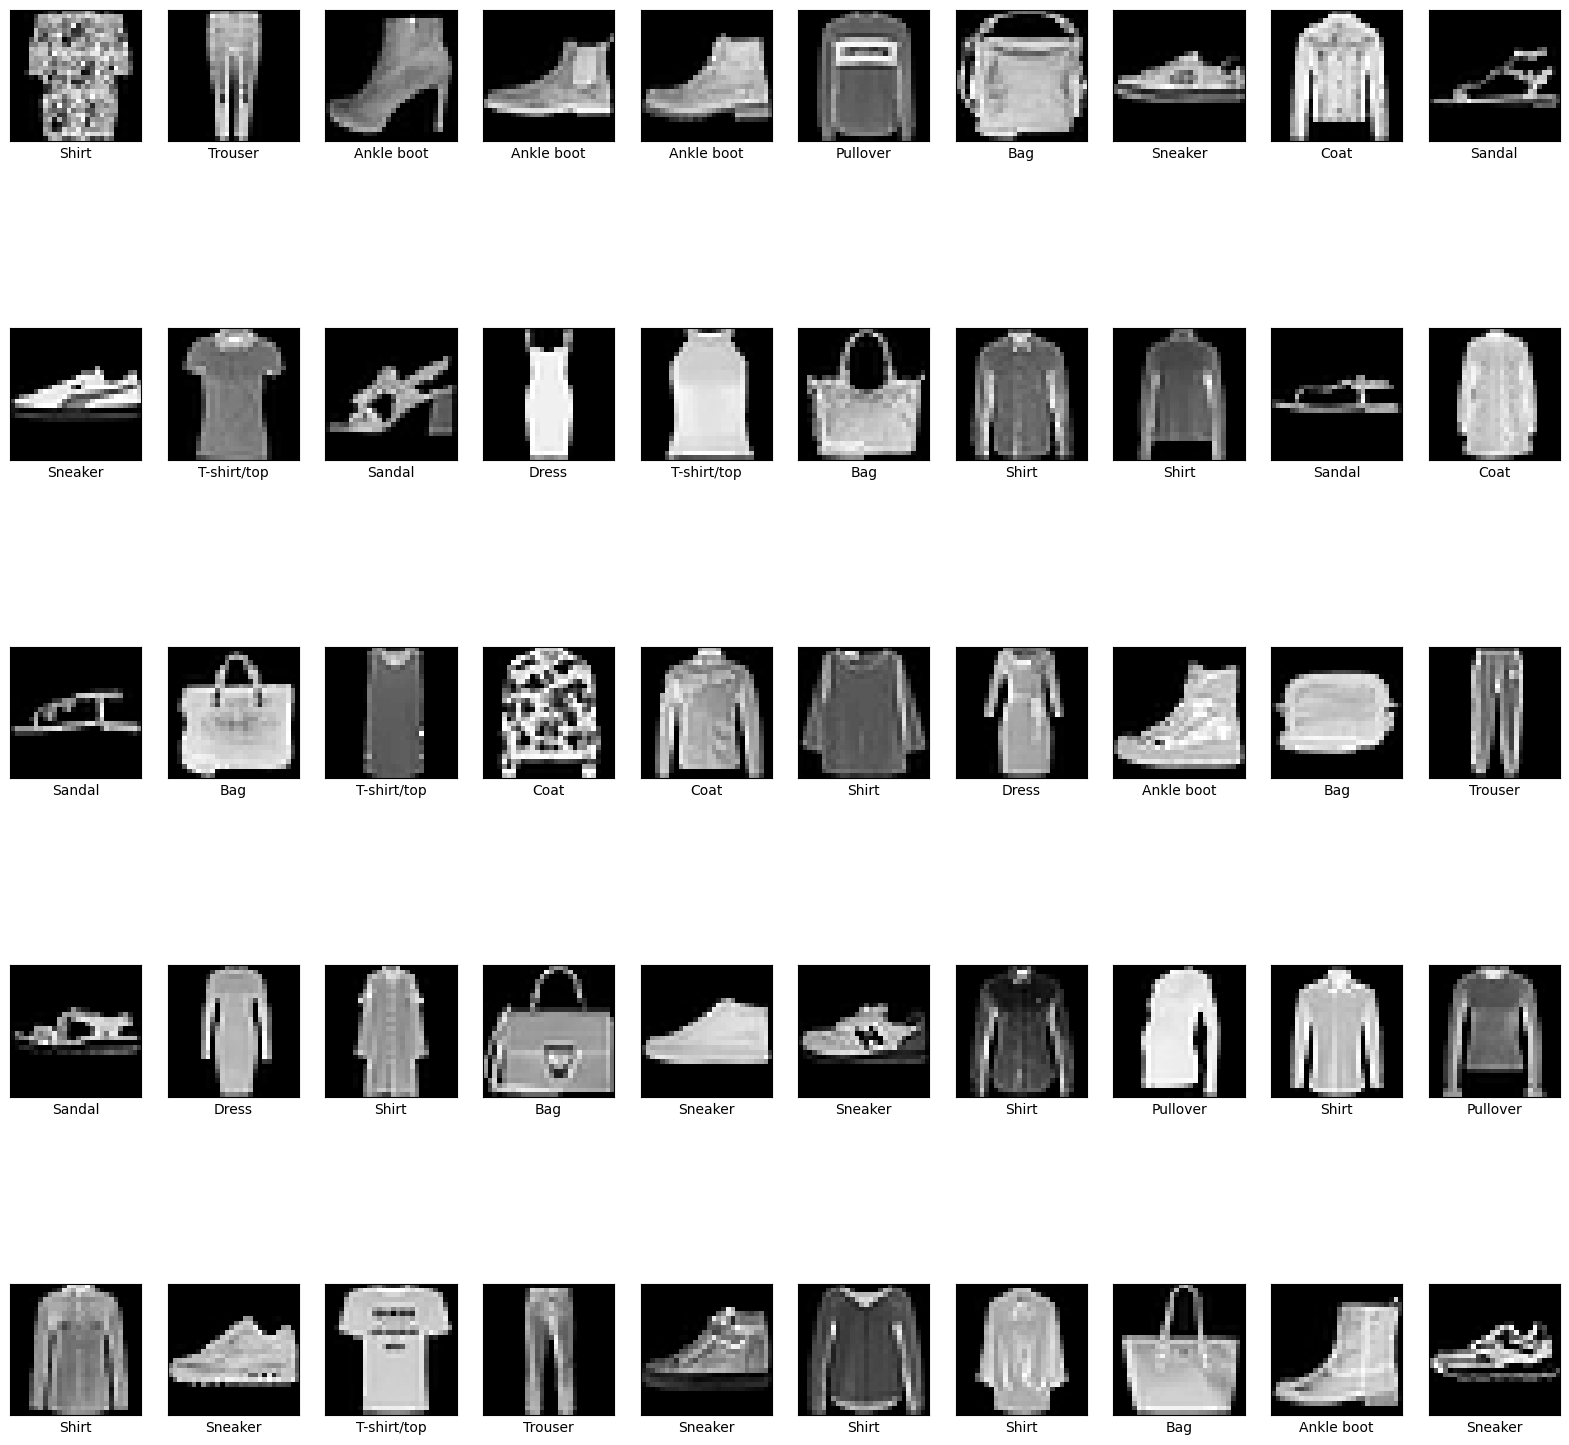

In [21]:
# Another view, showing 50 randomly selected images at a time
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')

    img_index = np.random.randint(0, 50000)
    plt.imshow(train_images[img_index], cmap=plt.cm.gray)
    plt.xlabel(text_labels[train_labels[img_index]])

In [23]:
# Flatten the images
train_images_flatten = train_images.reshape(train_images.shape[0], 28 * 28)
validation_images_flatten = validation_images.reshape(validation_images.shape[0], 28 * 28)
test_images_flatten = test_images.reshape(test_images.shape[0], 28 * 28)


In [25]:
# Normalize the images
train_images_model = train_images_flatten / 255.0
validation_images_model = validation_images_flatten / 255.0
test_images_model = test_images_flatten / 255.0

In [27]:
# convert class vectors to binary class matrices
train_labels_categ = keras.utils.to_categorical(train_labels, 10)
validation_labels_categ = keras.utils.to_categorical(validation_labels, 10)
test_labels_categ = keras.utils.to_categorical(test_labels, 10)

### Train 

In [30]:
batch_size = 128
num_classes = 10
epochs = 40

# Create a sequential model here
model = keras.Sequential()

model.add(Dense(256, input_dim = 784, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

# End Code

In [32]:
print(train_images_model.shape)
print(train_labels_categ.shape)

(50000, 784)
(50000, 10)


In [34]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_images_model, train_labels_categ,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(validation_images_model, validation_labels_categ))

Epoch 1/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7161 - loss: 0.7899 - val_accuracy: 0.8222 - val_loss: 0.4763
Epoch 2/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8443 - loss: 0.4276 - val_accuracy: 0.8494 - val_loss: 0.4018
Epoch 3/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8627 - loss: 0.3755 - val_accuracy: 0.8750 - val_loss: 0.3479
Epoch 4/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8694 - loss: 0.3480 - val_accuracy: 0.8773 - val_loss: 0.3453
Epoch 5/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8785 - loss: 0.3292 - val_accuracy: 0.8747 - val_loss: 0.3383
Epoch 6/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8829 - loss: 0.3151 - val_accuracy: 0.8751 - val_loss: 0.3511
Epoch 7/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8903 - loss: 0.3000 - val_accuracy: 0.8734 - val_loss: 0.3597
Epoch 8/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8914 - loss: 0.2898 - val_accuracy: 0.

In [36]:
score = model.evaluate(test_images_model, test_labels_categ, verbose=0)
print('Test accuracy:', score[1])
# You should be able to get,at least, 88% accuracy

Test accuracy: 0.8889999985694885


In [38]:
test_logits = model.predict(test_images_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step


In [40]:
test_logits

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.99999994],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99999994,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [42]:
test_predictions = np.argmax(test_logits, axis=1)

In [44]:
test_predictions

array([9, 2, 1, ..., 8, 1, 5])

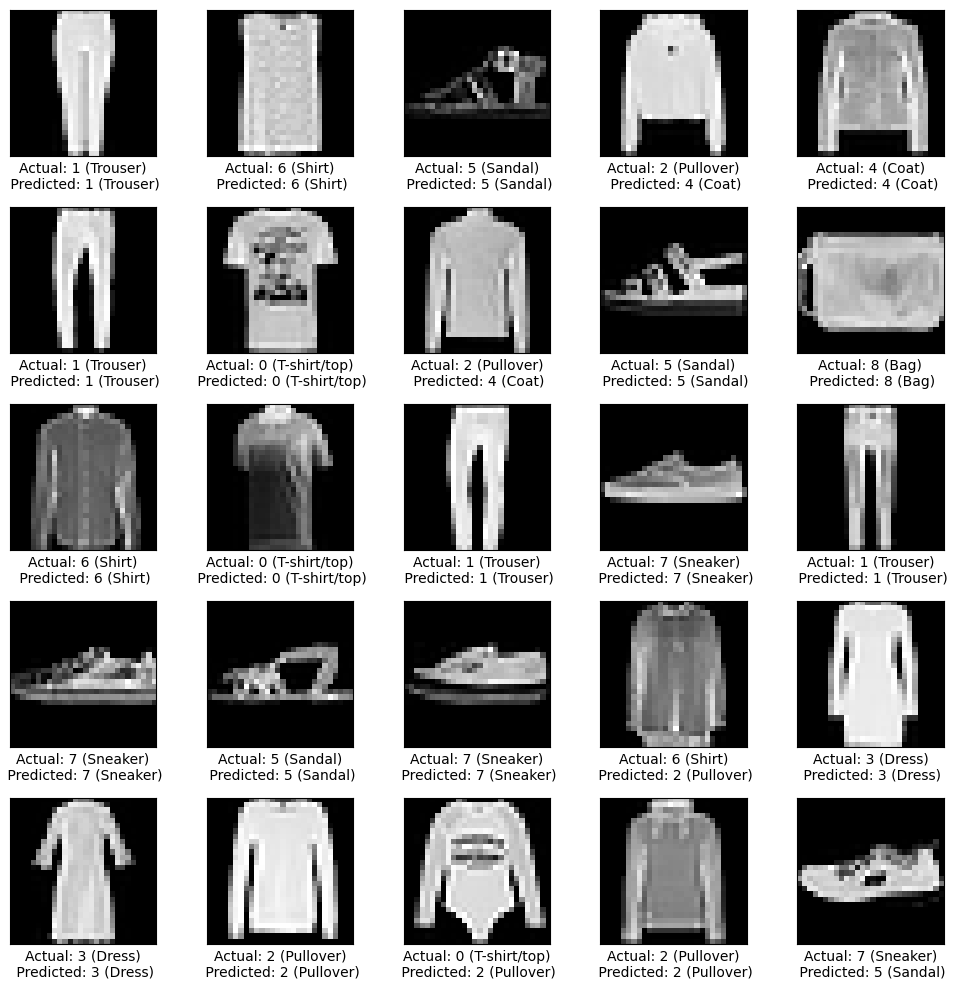

In [46]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')

    img_index = np.random.randint(0, 10000)
    plt.imshow(test_images[img_index], cmap=plt.cm.gray)

    actual_label = test_labels[img_index]
    predicted_label = test_predictions[img_index]

    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, text_labels[actual_label], predicted_label, text_labels[predicted_label]
    ))

plt.tight_layout()
plt.show()